# Exploratory Data Analysis – Software Defect Dataset

Objective: To analyze dataset structure, feature distributions, class imbalance, and correlations prior to model training.

In [40]:
import pandas as pd

df = pd.read_csv("../data/kc1.csv")
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [41]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                2109 non-null   float64
 1   v(g)               2109 non-null   float64
 2   ev(g)              2109 non-null   float64
 3   iv(g)              2109 non-null   float64
 4   n                  2109 non-null   float64
 5   v                  2109 non-null   float64
 6   l                  2109 non-null   float64
 7   d                  2109 non-null   float64
 8   i                  2109 non-null   float64
 9   e                  2109 non-null   float64
 10  b                  2109 non-null   float64
 11  t                  2109 non-null   float64
 12  lOCode             2109 non-null   int64  
 13  lOComment          2109 non-null   int64  
 14  lOBlank            2109 non-null   int64  
 15  locCodeAndComment  2109 non-null   int64  
 16  uniq_Op            2109 non-null   

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [42]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.00000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,2.838028,1.674443,2.546420,49.829445,258.696719,0.319583,6.771242,21.240071,5242.386240,...,291.24504,14.525367,0.945946,1.759602,0.132764,7.631674,9.537316,31.043717,18.786724,4.665908
std,29.754442,3.900763,2.200659,3.375859,83.599874,516.317605,0.317029,7.863646,21.500367,17444.981211,...,969.16516,24.188302,3.085271,3.856850,0.704023,5.730347,12.195727,51.776056,32.074398,7.792206
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.67000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.89000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.200000,29.850000,2276.020000,...,126.45000,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.64000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


The dataset consists of 2109 software modules described by 22 static code metrics. No missing values were detected.

In [43]:
x = df.drop("defects", axis=1)
y = df["defects"]

y.value_counts(normalize=True)

defects
False    0.845424
True     0.154576
Name: proportion, dtype: float64

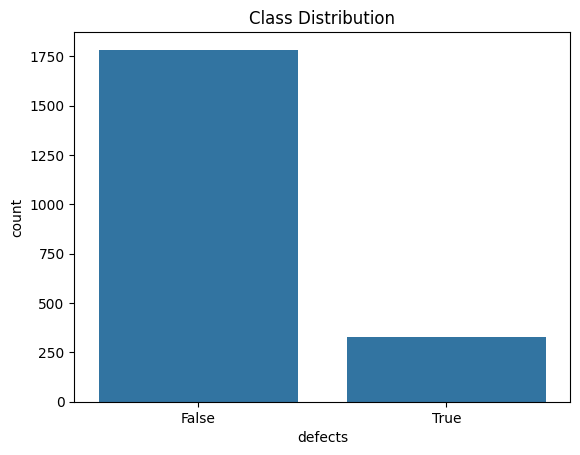

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

The dataset shows class imbalance, with defective modules representing approximately 15% of the samples. Therefore, evaluation metrics beyond accuracy will be required. In subsequent modeling steps, particular attention will be given to precision, recall, and F1-score.

In [45]:
x.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.00000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,2.838028,1.674443,2.546420,49.829445,258.696719,0.319583,6.771242,21.240071,5242.386240,...,291.24504,14.525367,0.945946,1.759602,0.132764,7.631674,9.537316,31.043717,18.786724,4.665908
std,29.754442,3.900763,2.200659,3.375859,83.599874,516.317605,0.317029,7.863646,21.500367,17444.981211,...,969.16516,24.188302,3.085271,3.856850,0.704023,5.730347,12.195727,51.776056,32.074398,7.792206
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.67000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.89000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.200000,29.850000,2276.020000,...,126.45000,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.64000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


array([[<Axes: title={'center': 'loc'}>,
        <Axes: title={'center': 'v(g)'}>,
        <Axes: title={'center': 'ev(g)'}>,
        <Axes: title={'center': 'iv(g)'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'l'}>,
        <Axes: title={'center': 'd'}>, <Axes: title={'center': 'i'}>,
        <Axes: title={'center': 'e'}>],
       [<Axes: title={'center': 'b'}>, <Axes: title={'center': 't'}>,
        <Axes: title={'center': 'lOCode'}>,
        <Axes: title={'center': 'lOComment'}>,
        <Axes: title={'center': 'lOBlank'}>],
       [<Axes: title={'center': 'locCodeAndComment'}>,
        <Axes: title={'center': 'uniq_Op'}>,
        <Axes: title={'center': 'uniq_Opnd'}>,
        <Axes: title={'center': 'total_Op'}>,
        <Axes: title={'center': 'total_Opnd'}>],
       [<Axes: title={'center': 'branchCount'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

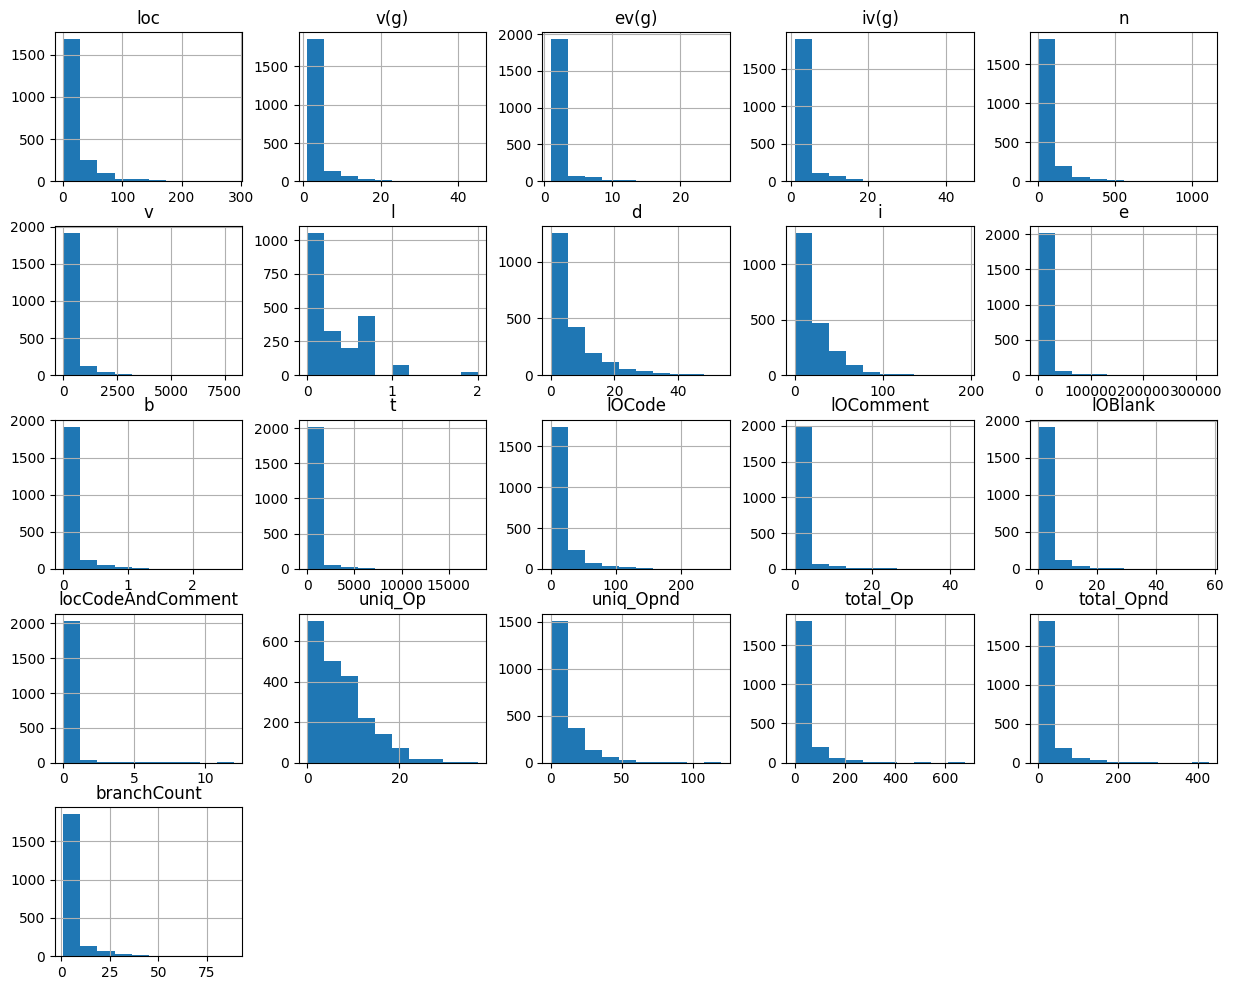

In [46]:
x.hist(figsize=(15,12))

Several static code metrics exhibit right-skewed distributions, which is common in software engineering data due to the presence of many small modules and fewer large ones. Since tree-based models are robust to skewness and linear models will be scaled, no transformation was applied at this stage.

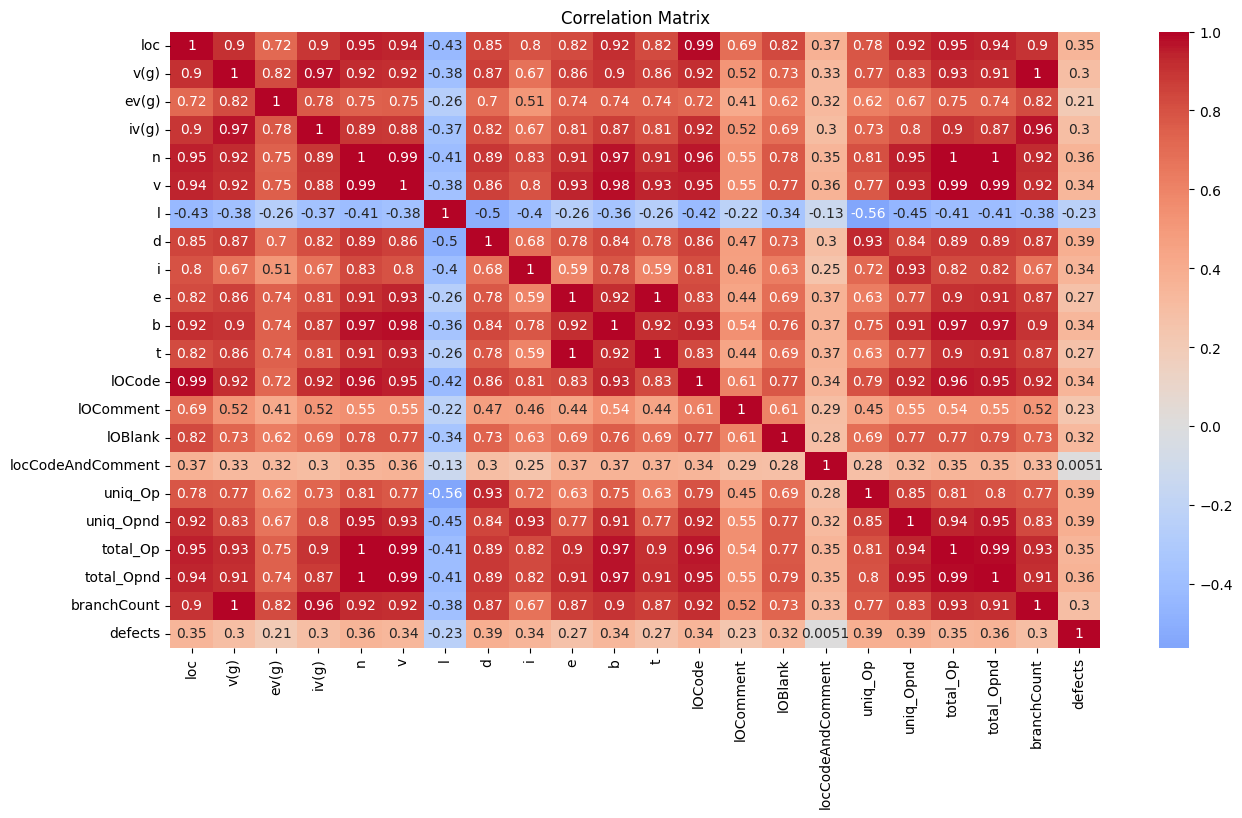

In [47]:
corr = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [48]:
corr["defects"].sort_values()

l                   -0.232877
locCodeAndComment    0.005067
ev(g)                0.205159
lOComment            0.232866
e                    0.270070
t                    0.270071
v(g)                 0.295570
iv(g)                0.295694
branchCount          0.297827
lOBlank              0.323620
b                    0.339028
v                    0.339539
lOCode               0.341529
i                    0.342854
loc                  0.348405
total_Op             0.348785
n                    0.355101
total_Opnd           0.362549
uniq_Op              0.385566
uniq_Opnd            0.386714
d                    0.387493
defects              1.000000
Name: defects, dtype: float64

Features show moderate correlations with defects (0.2–0.38). But the dataset contains substantial multicollinearity, with over 60 feature pairs exhibiting correlation above 0.9. This is expected due to derived Halstead metrics. To improve model stability and interpretability, redundant features will be removed prior to training linear models.

In [ ]:
import numpy as np

corr_matrix = x.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(len(to_drop))
print(to_drop)

13
['v(g)', 'iv(g)', 'n', 'v', 'e', 'b', 't', 'lOCode', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


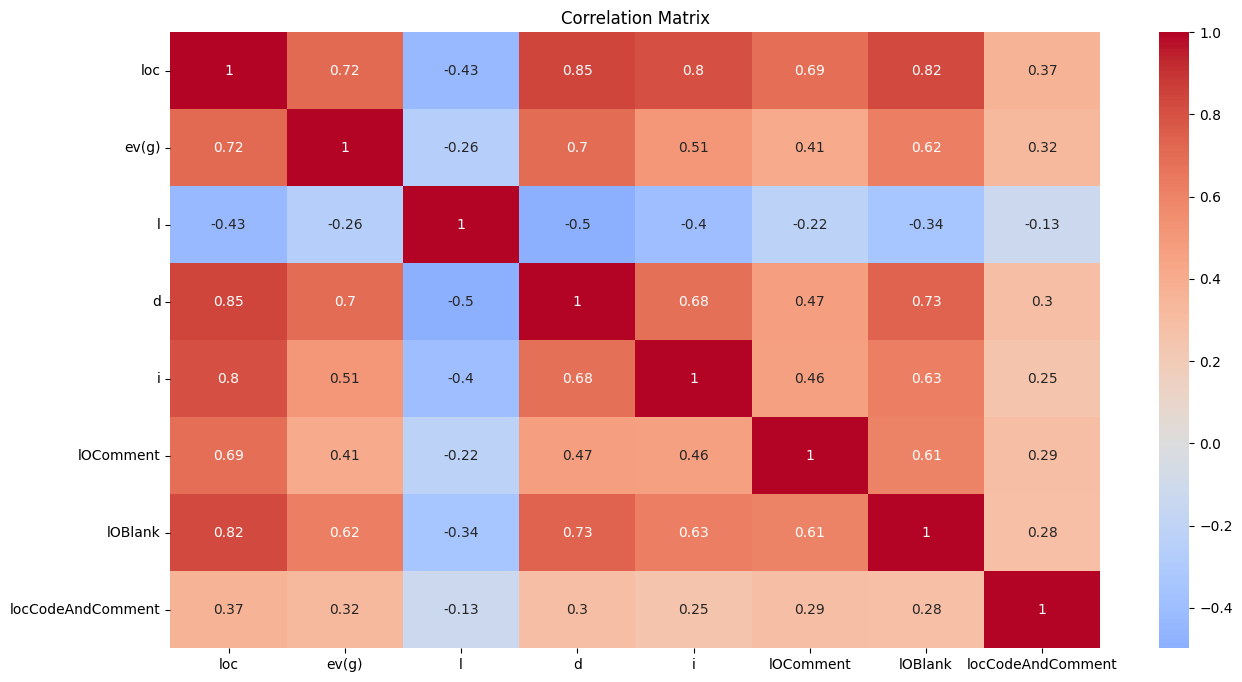

In [58]:
x_reduced = x.drop(columns=to_drop)
corr = x_reduced.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [61]:
x_reduced.to_csv("../data/x_clean.csv", index=False)
y.to_csv("../data/y_clean.csv", index=False)

After removing highly correlated features (threshold = 0.9), the number of predictors was reduced from 21 to 8. The updated correlation matrix confirms that multicollinearity has been substantially reduced.

# Summary

- The dataset contains 2109 samples described by 22 static code metrics.
- 15% of modules are defective, indicating class imbalance.
- Several features show moderate correlation with defect status (0.2–0.38).
- Strong multicollinearity was detected, and 13 redundant features were removed.
- The final feature set contains 8 predictors suitable for modeling.
- Scaling will be required for linear models.
- Evaluation must focus on recall and F1-score.